In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

'c:\\Users\\IvanEsin\\OneDrive - Digital Hive\\Documenten\\GitHub\\Polaris_vs_Pandas\\benchmarks'

## PLOTS FOR READING BENCHMARKS

In [59]:
df=pd.read_csv('./csv_benchmarks/fct_benchmarks.csv')

In [60]:
df['duration'] = df.groupby(['cmdline_file', 'cmdline_args'])['timestamp'].transform(lambda x: x - x.min())


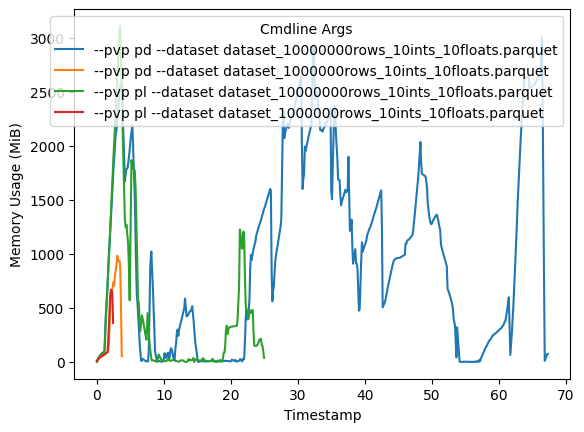

In [61]:
# Create a line plot with color based on cmdline_args
sns.lineplot(data=df, x='duration', y='mem_usage_mib', hue='cmdline_args')

# Set the x-axis and y-axis labels
plt.xlabel('Timestamp')
plt.ylabel('Memory Usage (MiB)')

# Show the legend
plt.legend(title='Cmdline Args')

# Show the plot
plt.show()


In [75]:
df = df.rename(columns={'Unnamed: 0': 'i'})

,i,mem_usage_mib,timestamp,cmdline_file,cmdline_args,duration
0,0,1.097656,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.0000
1,1,17.843750,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.1090
2,2,32.691406,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.2139
3,3,45.832031,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.3307
4,4,57.175781,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.4363
...,...,...,...,...,...,...
719,17,607.859375,1.698186e+09,./benchmarks/filtering.py,--pvp pl --dataset dataset_1000000rows_10ints_...,1.9716
720,18,665.980469,1.698186e+09,./benchmarks/filtering.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.0834
721,19,666.316406,1.698186e+09,./benchmarks/filtering.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.1923
722,20,619.707031,1.698186e+09,./benchmarks/filtering.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.3048


In [93]:
df_1000000 = df[df['cmdline_args'].isin(['--pvp pd --dataset dataset_1000000rows_10ints_10floats.parquet', '--pvp pl --dataset dataset_1000000rows_10ints_10floats.parquet'])]
df_10000000 = df[df['cmdline_args'].isin(['--pvp pd --dataset dataset_10000000rows_10ints_10floats.parquet', '--pvp pl --dataset dataset_10000000rows_10ints_10floats.parquet'])]

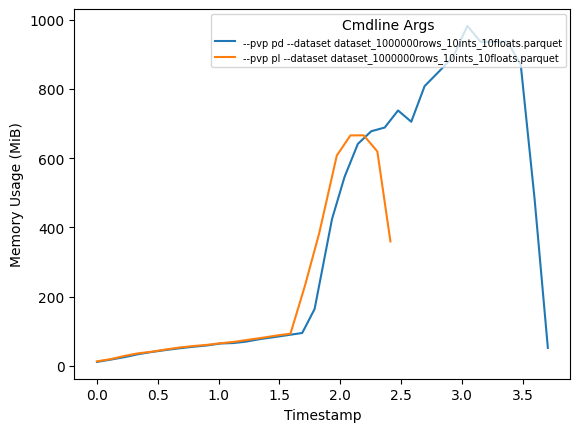

In [106]:
# Create a line plot with color based on cmdline_args
sns.lineplot(data=df_1000000, x='duration', y='mem_usage_mib', hue='cmdline_args')

# Set the x-axis and y-axis labels
plt.xlabel('Timestamp')
plt.ylabel('Memory Usage (MiB)')

# Show the legend
plt.legend(title='Cmdline Args', loc='upper right', fontsize=7)

# Show the plot
plt.show()

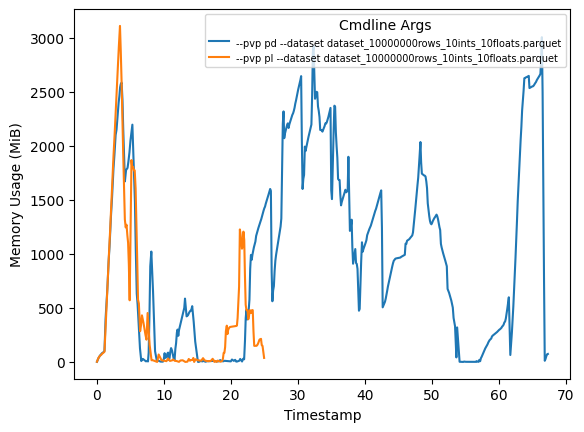

In [105]:
# Create a line plot with color based on cmdline_args
sns.lineplot(data=df_10000000, x='duration', y='mem_usage_mib', hue='cmdline_args')

# Set the x-axis and y-axis labels
plt.xlabel('Timestamp')
plt.ylabel('Memory Usage (MiB)')

# Show the legend
plt.legend(title='Cmdline Args', loc='upper right', fontsize=7)

# Show the plot
plt.show()

## PREPROCESS DATASETS

In [148]:
dfall=pd.read_csv('./csv_benchmarks/all.csv')
dfall['duration'] = dfall.groupby(['cmdline_file', 'cmdline_args'])['timestamp'].transform(lambda x: x - x.min())
dfall = dfall.rename(columns={'Unnamed: 0': 'i'})
dfall


,i,mem_usage_mib,timestamp,cmdline_file,cmdline_args,duration
0,0,1.097656,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.0000
1,1,17.843750,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.1090
2,2,32.691406,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.2139
3,3,45.832031,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.3307
4,4,57.175781,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.4363
...,...,...,...,...,...,...
9643,23,1032.089844,1.698223e+09,./benchmarks/joinings.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.7047
9644,24,1032.089844,1.698223e+09,./benchmarks/joinings.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.8160
9645,25,1032.089844,1.698223e+09,./benchmarks/joinings.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.9276
9646,26,999.738281,1.698223e+09,./benchmarks/joinings.py,--pvp pl --dataset dataset_1000000rows_10ints_...,3.0335


In [149]:
dfall['pvp'] = dfall['cmdline_args'].str.extract(r'--pvp (\w+)')
dfall['dataset'] = dfall['cmdline_args'].str.extract(r'--dataset (\w+)')
dfall['type_join'] = dfall['cmdline_args'].str.extract(r'--type_join (\w+)')
dfall['join_on'] = dfall['cmdline_args'].str.extract(r'--join_on (\w+)')
dfall

,i,mem_usage_mib,timestamp,cmdline_file,cmdline_args,duration,pvp,dataset,type_join,join_on
0,0,1.097656,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.0000,pd,dataset_10000000rows_10ints_10floats,NaN,NaN
1,1,17.843750,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.1090,pd,dataset_10000000rows_10ints_10floats,NaN,NaN
2,2,32.691406,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.2139,pd,dataset_10000000rows_10ints_10floats,NaN,NaN
3,3,45.832031,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.3307,pd,dataset_10000000rows_10ints_10floats,NaN,NaN
4,4,57.175781,1.698186e+09,./benchmarks/filtering.py,--pvp pd --dataset dataset_10000000rows_10ints...,0.4363,pd,dataset_10000000rows_10ints_10floats,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
9643,23,1032.089844,1.698223e+09,./benchmarks/joinings.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.7047,pl,dataset_1000000rows_10ints_10floats,outer,country_code
9644,24,1032.089844,1.698223e+09,./benchmarks/joinings.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.8160,pl,dataset_1000000rows_10ints_10floats,outer,country_code
9645,25,1032.089844,1.698223e+09,./benchmarks/joinings.py,--pvp pl --dataset dataset_1000000rows_10ints_...,2.9276,pl,dataset_1000000rows_10ints_10floats,outer,country_code
9646,26,999.738281,1.698223e+09,./benchmarks/joinings.py,--pvp pl --dataset dataset_1000000rows_10ints_...,3.0335,pl,dataset_1000000rows_10ints_10floats,outer,country_code


## PLOTS FOR FILTERING BENCHMARKS

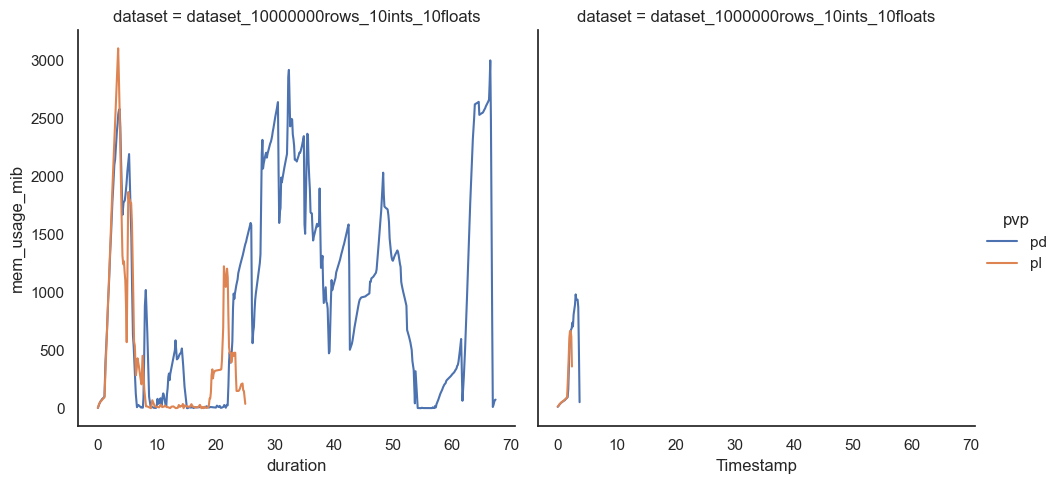

In [193]:
dffilter=dfall[dfall['cmdline_file'] == './benchmarks/filtering.py']
# dffilter1000000=dffilter[dffilter['dataset'] == 'dataset_1000000rows_10ints_10floats']
# dffilter100000=dffilter[dffilter['dataset'] == 'dataset_100000rows_10ints_10floats']


# Create a line plot with color based on cmdline_args
sns.relplot(
    data=dffilter, x='duration', y='mem_usage_mib', hue='pvp', col='dataset', kind='line')

# Set the x-axis and y-axis labels
plt.xlabel('Timestamp')
plt.ylabel('Memory Usage (MiB)')

# Show the legend
#plt.legend(title='Cmdline Args', loc='upper left', fontsize=7)

# Show the plot
plt.show()

## PLOTS FOR JOININGS BENCHMARKS

In [196]:
dfjoins=dfall[dfall['cmdline_file'] == './benchmarks/joinings.py']
dfjoins10000000=dfjoins[dfjoins['dataset'] == 'dataset_10000000rows_10ints_10floats']
dfjoins1000000=dfjoins[dfjoins['dataset'] == 'dataset_1000000rows_10ints_10floats']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


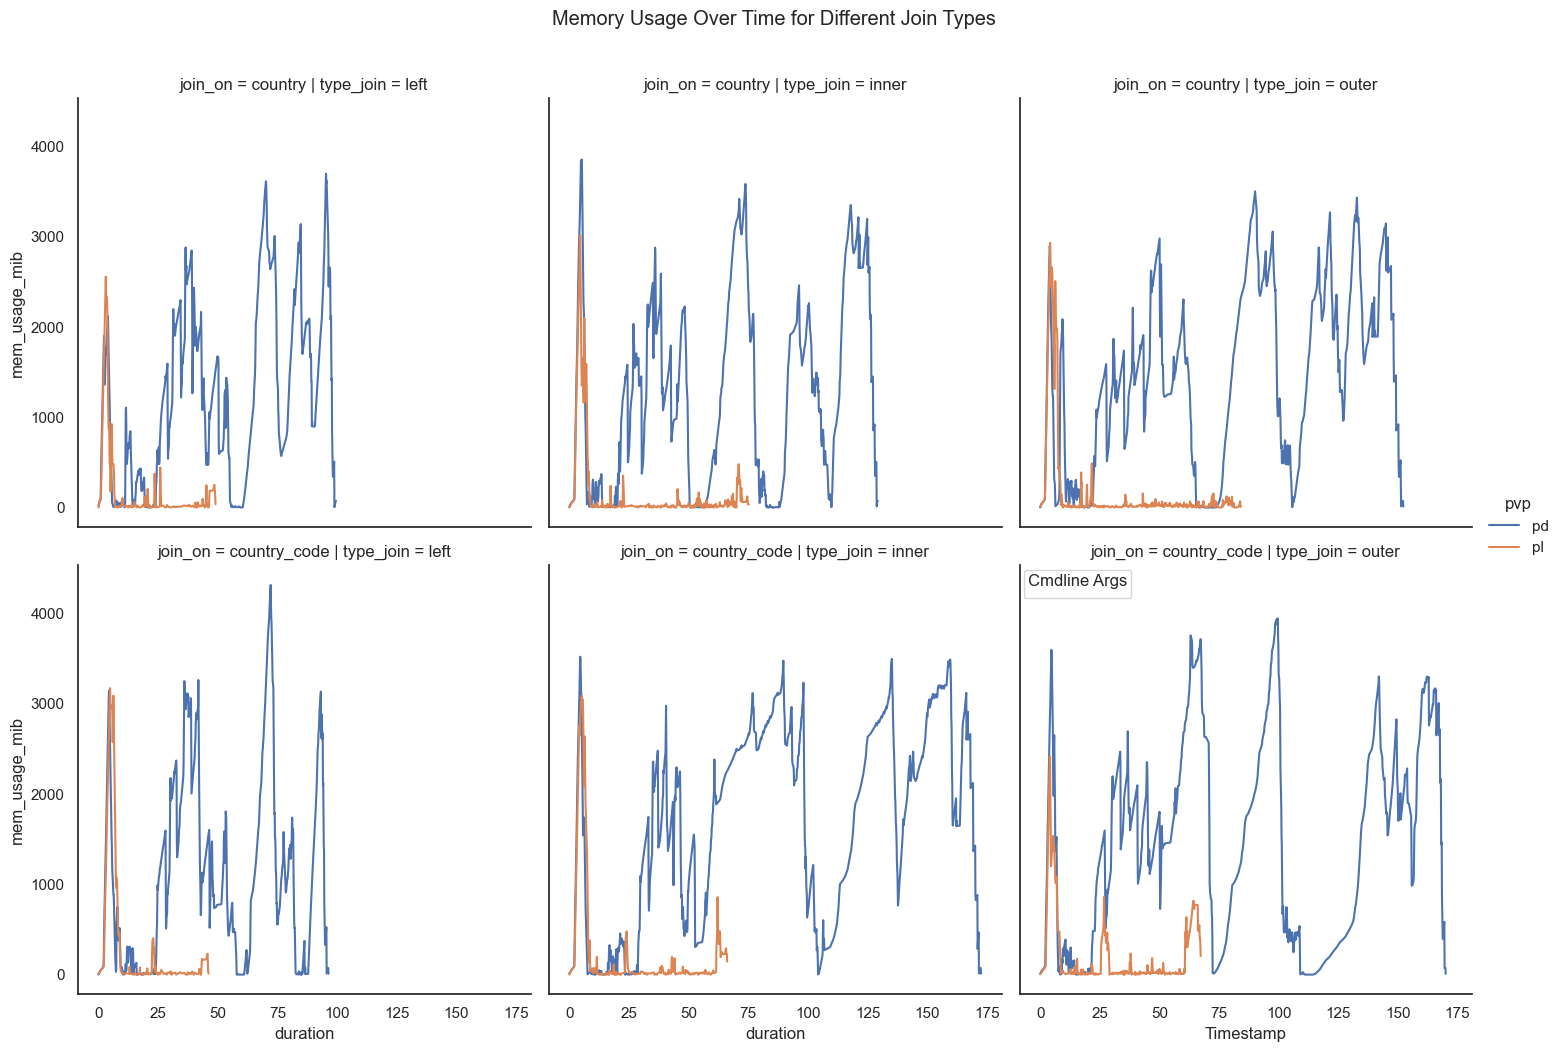

In [203]:
# Create a line plot with color based on cmdline_args
sns.relplot(
    data=dfjoins10000000, x='duration', y='mem_usage_mib', hue='pvp', kind='line', col='type_join', row='join_on')

sns.set_theme(style='white')

# Set the x-axis and y-axis labels
plt.xlabel('Timestamp')
plt.ylabel('Memory Usage (MiB)')
plt.suptitle('Memory Usage Over Time for Different Join Types', y=1.05)


# Show the legend
plt.legend(title='Cmdline Args', loc='upper left', fontsize=7)

# Show the plot
plt.show()

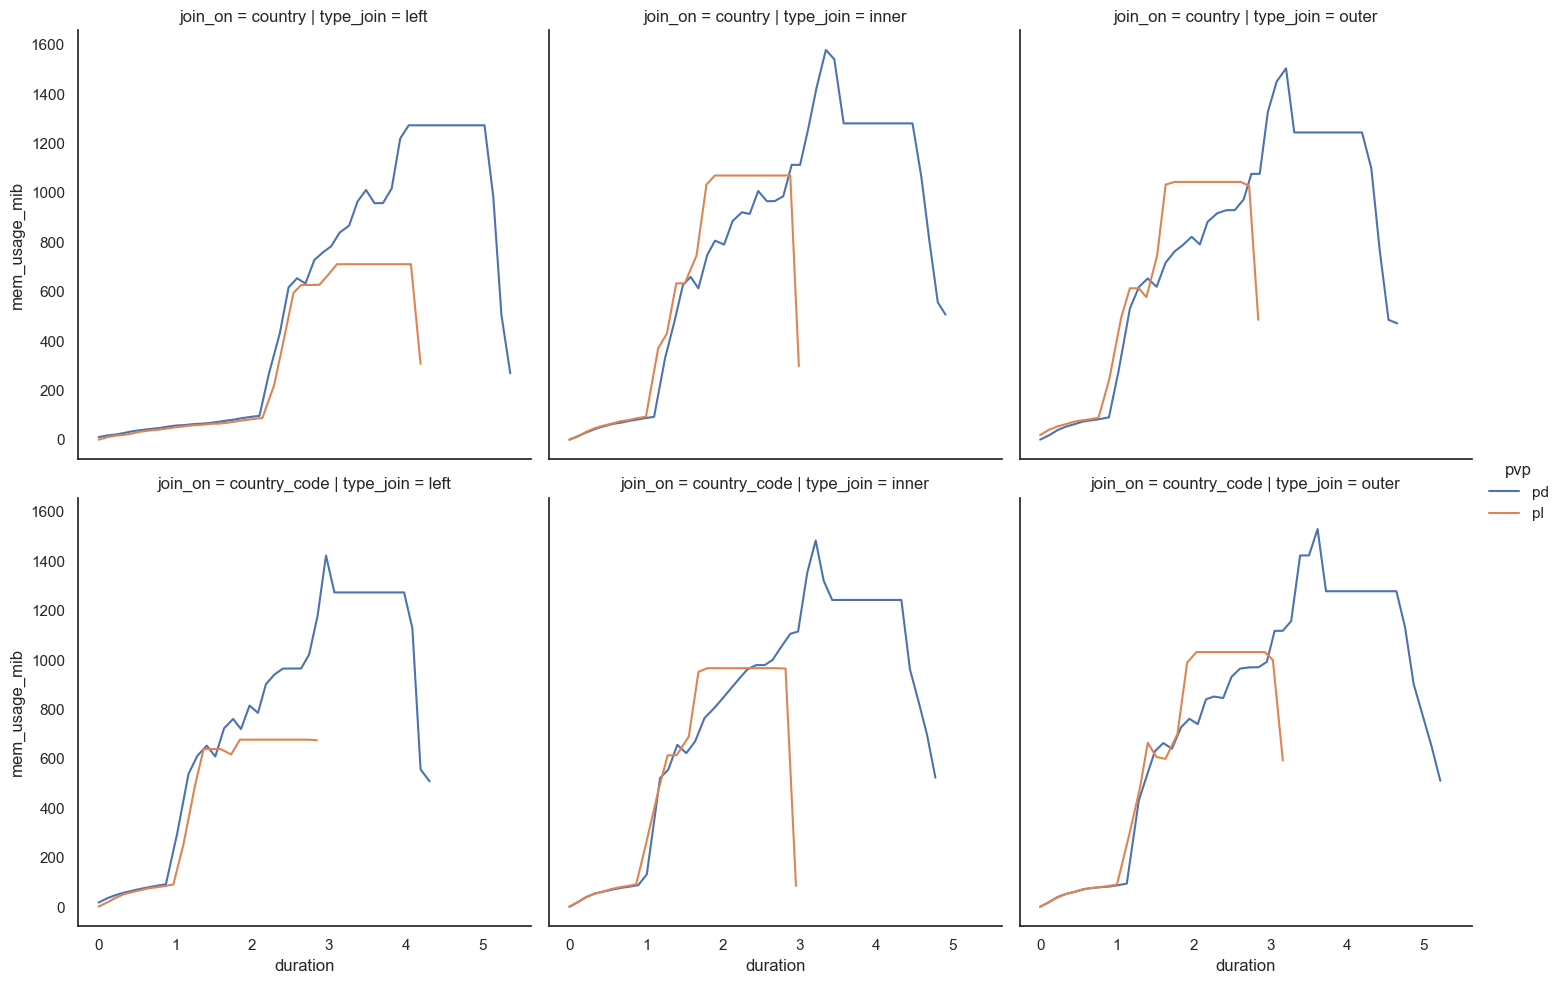

In [199]:
# Create a line plot with color based on cmdline_args
sns.relplot(
    data=dfjoins1000000, x='duration', y='mem_usage_mib', hue='pvp', kind='line', col='type_join', row='join_on')

# # Set the x-axis and y-axis labels
# plt.xlabel('duration')
# plt.ylabel('Memory Usage (MiB)')

# # Show the legend
# plt.legend(title='Cmdline Args', loc='upper left', fontsize=7)

# Show the plot
plt.show()

# NEW

# PREPARATION

Read csv with data from .dat files and add duration from unix timestamps

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
allDF=pd.read_csv('./csv_benchmarks/all.csv')
allDF['duration'] = allDF.groupby(['cmdline_file', 'cmdline_args'])['timestamp'].transform(lambda x: x - x.min())
allDF = allDF.rename(columns={'Unnamed: 0': 'i'})
allDF


,i,mem_usage_mib,timestamp,cmdline_file,cmdline_args,duration
0,0,1.597656,1.698346e+09,./benchmarks/writing.py,--pvp pd --num_rows 1000000 --num_int_cols 5 -...,0.0000
1,1,15.054688,1.698346e+09,./benchmarks/writing.py,--pvp pd --num_rows 1000000 --num_int_cols 5 -...,0.1047
2,2,26.421875,1.698346e+09,./benchmarks/writing.py,--pvp pd --num_rows 1000000 --num_int_cols 5 -...,0.2071
3,3,41.203125,1.698346e+09,./benchmarks/writing.py,--pvp pd --num_rows 1000000 --num_int_cols 5 -...,0.3200
4,4,53.179688,1.698346e+09,./benchmarks/writing.py,--pvp pd --num_rows 1000000 --num_int_cols 5 -...,0.4301
...,...,...,...,...,...,...
19203,20,2176.632812,1.698354e+09,./benchmarks/aggregating.py,--pvp pl --dataset dataset_5000000rows_5ints_5...,2.5649
19204,21,2217.761719,1.698354e+09,./benchmarks/aggregating.py,--pvp pl --dataset dataset_5000000rows_5ints_5...,2.6944
19205,22,2205.527344,1.698354e+09,./benchmarks/aggregating.py,--pvp pl --dataset dataset_5000000rows_5ints_5...,2.7947
19206,23,1956.894531,1.698354e+09,./benchmarks/aggregating.py,--pvp pl --dataset dataset_5000000rows_5ints_5...,2.9233


Extract the cmd line options

In [4]:
allDF['pvp'] = allDF['cmdline_args'].str.extract(r'--pvp (\w+)')
allDF['dataset'] = allDF['cmdline_args'].str.extract(r'--dataset (\w+)')
allDF['type_join'] = allDF['cmdline_args'].str.extract(r'--type_join (\w+)')
allDF['join_on'] = allDF['cmdline_args'].str.extract(r'--join_on (\w+)')
allDF['num_rows'] = allDF['cmdline_args'].str.extract(r'--num_rows (\w+)')
allDF['num_cols'] = allDF['cmdline_args'].str.extract(r'--num_int_cols (\w+)')
allDF

,i,mem_usage_mib,timestamp,cmdline_file,cmdline_args,duration,pvp,dataset,type_join,join_on,num_rows,num_cols
0,0,1.597656,1.698346e+09,./benchmarks/writing.py,--pvp pd --num_rows 1000000 --num_int_cols 5 -...,0.0000,pd,NaN,NaN,NaN,1000000,5
1,1,15.054688,1.698346e+09,./benchmarks/writing.py,--pvp pd --num_rows 1000000 --num_int_cols 5 -...,0.1047,pd,NaN,NaN,NaN,1000000,5
2,2,26.421875,1.698346e+09,./benchmarks/writing.py,--pvp pd --num_rows 1000000 --num_int_cols 5 -...,0.2071,pd,NaN,NaN,NaN,1000000,5
3,3,41.203125,1.698346e+09,./benchmarks/writing.py,--pvp pd --num_rows 1000000 --num_int_cols 5 -...,0.3200,pd,NaN,NaN,NaN,1000000,5
4,4,53.179688,1.698346e+09,./benchmarks/writing.py,--pvp pd --num_rows 1000000 --num_int_cols 5 -...,0.4301,pd,NaN,NaN,NaN,1000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
19203,20,2176.632812,1.698354e+09,./benchmarks/aggregating.py,--pvp pl --dataset dataset_5000000rows_5ints_5...,2.5649,pl,dataset_5000000rows_5ints_5floats,NaN,NaN,NaN,NaN
19204,21,2217.761719,1.698354e+09,./benchmarks/aggregating.py,--pvp pl --dataset dataset_5000000rows_5ints_5...,2.6944,pl,dataset_5000000rows_5ints_5floats,NaN,NaN,NaN,NaN
19205,22,2205.527344,1.698354e+09,./benchmarks/aggregating.py,--pvp pl --dataset dataset_5000000rows_5ints_5...,2.7947,pl,dataset_5000000rows_5ints_5floats,NaN,NaN,NaN,NaN
19206,23,1956.894531,1.698354e+09,./benchmarks/aggregating.py,--pvp pl --dataset dataset_5000000rows_5ints_5...,2.9233,pl,dataset_5000000rows_5ints_5floats,NaN,NaN,NaN,NaN


# WRITE

In [5]:
dfwriting=allDF[allDF['cmdline_file'] == './benchmarks/writing.py']

In [6]:
dfwriting['num_cols'] = dfwriting['num_cols'] + 'ints_' + dfwriting['num_cols'] + 'floats'

C:\Users\IvanEsin\AppData\Local\Temp\ipykernel_1472\2233763483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfwriting['num_cols'] = dfwriting['num_cols'] + 'ints_' + dfwriting['num_cols'] + 'floats'


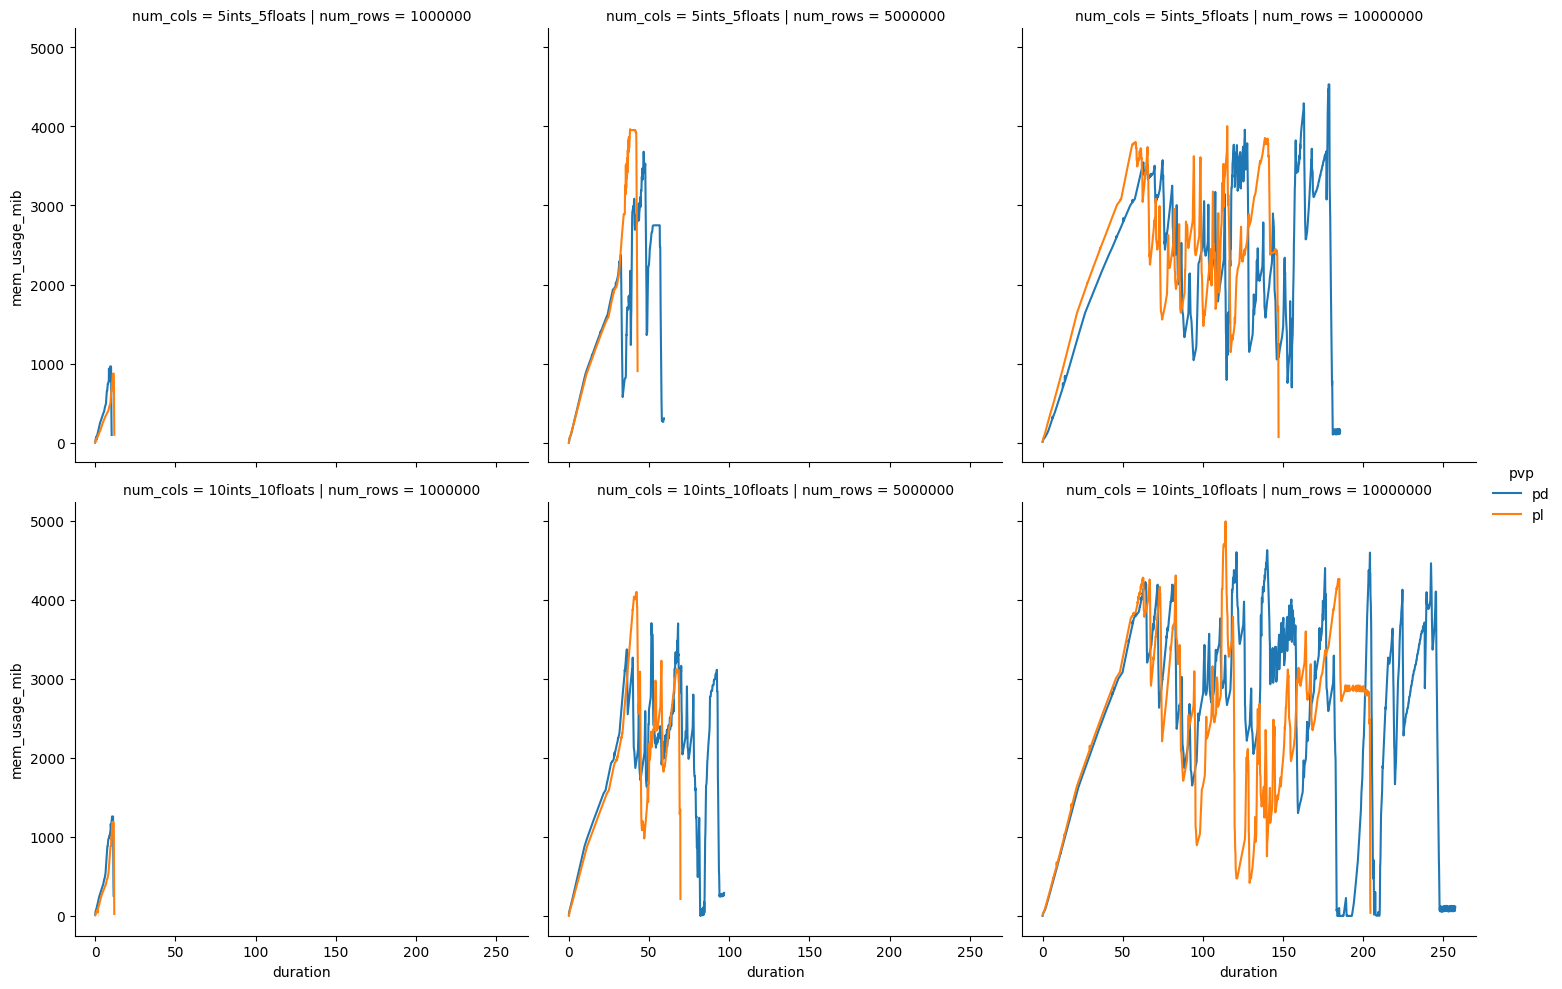

In [7]:
# Create a line plot with color based on cmdline_args
sns.relplot(
    data=dfwriting, x='duration', y='mem_usage_mib', hue='pvp', col='num_rows', 
    row='num_cols', kind='line')

# Set the x-axis and y-axis labels
# plt.xlabel('Timestamp')
# plt.ylabel('Memory Usage (MiB)')

# Show the legend
#plt.legend(title='Cmdline Args', loc='upper left', fontsize=7)

# Show the plot
plt.show()

In [28]:
dfwriting[dfwriting['num_rows'] != '1000000']

,i,mem_usage_mib,timestamp,cmdline_file,cmdline_args,duration,pvp,dataset,type_join,join_on,num_rows,num_cols
95,0,1.589844,1.698346e+09,./benchmarks/writing.py,--pvp pd --num_rows 5000000 --num_int_cols 5 -...,0.0000,pd,NaN,NaN,NaN,5000000,5ints_5floats
96,1,16.050781,1.698346e+09,./benchmarks/writing.py,--pvp pd --num_rows 5000000 --num_int_cols 5 -...,0.1042,pd,NaN,NaN,NaN,5000000,5ints_5floats
97,2,33.937500,1.698346e+09,./benchmarks/writing.py,--pvp pd --num_rows 5000000 --num_int_cols 5 -...,0.2150,pd,NaN,NaN,NaN,5000000,5ints_5floats
98,3,46.902344,1.698346e+09,./benchmarks/writing.py,--pvp pd --num_rows 5000000 --num_int_cols 5 -...,0.3210,pd,NaN,NaN,NaN,5000000,5ints_5floats
99,4,57.367188,1.698346e+09,./benchmarks/writing.py,--pvp pd --num_rows 5000000 --num_int_cols 5 -...,0.4354,pd,NaN,NaN,NaN,5000000,5ints_5floats
...,...,...,...,...,...,...,...,...,...,...,...,...
9970,1851,2468.921875,1.698350e+09,./benchmarks/writing.py,--pvp pl --num_rows 10000000 --num_int_cols 10...,203.9734,pl,NaN,NaN,NaN,10000000,10ints_10floats
9971,1852,2490.289062,1.698350e+09,./benchmarks/writing.py,--pvp pl --num_rows 10000000 --num_int_cols 10...,204.0834,pl,NaN,NaN,NaN,10000000,10ints_10floats
9972,1853,1845.097656,1.698350e+09,./benchmarks/writing.py,--pvp pl --num_rows 10000000 --num_int_cols 10...,204.2013,pl,NaN,NaN,NaN,10000000,10ints_10floats
9973,1854,193.371094,1.698350e+09,./benchmarks/writing.py,--pvp pl --num_rows 10000000 --num_int_cols 10...,204.3269,pl,NaN,NaN,NaN,10000000,10ints_10floats


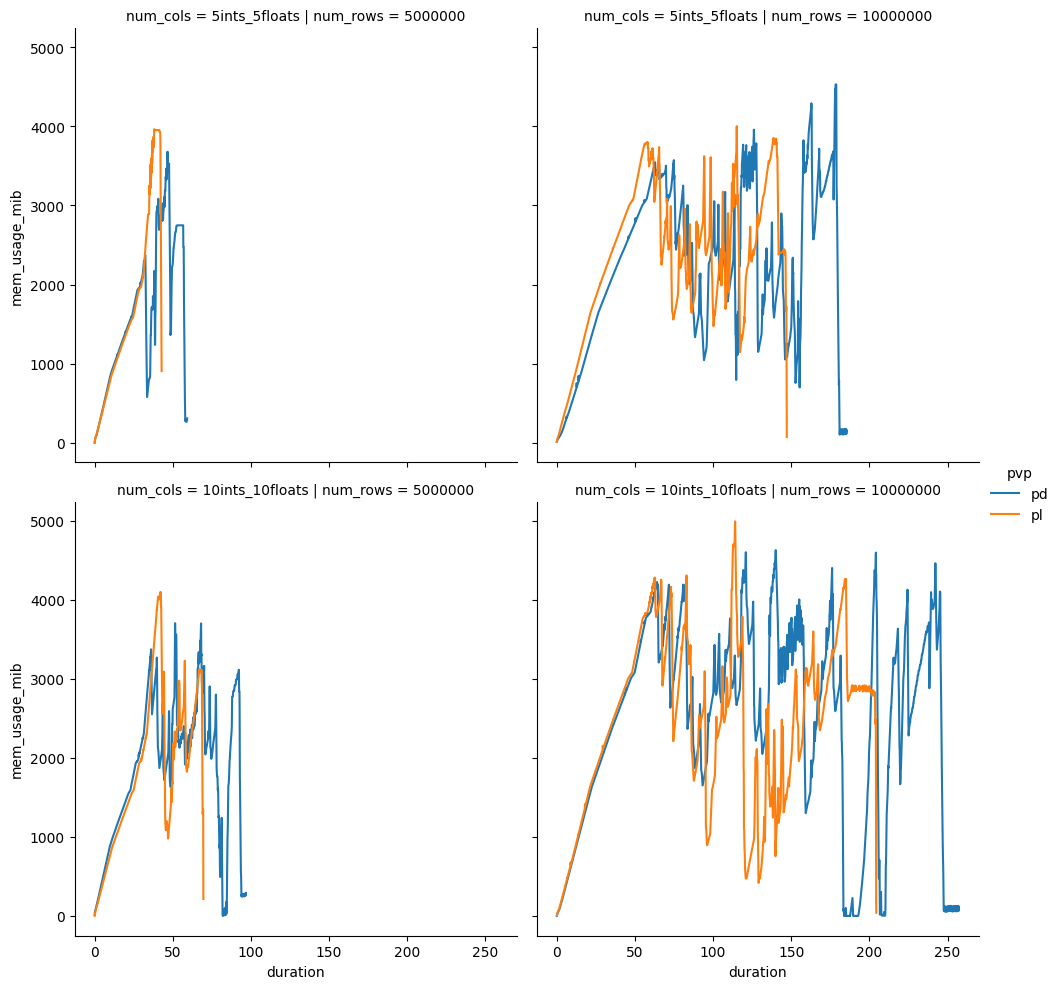

In [29]:
# Create a line plot with color based on cmdline_args
sns.relplot(
    data=dfwriting[dfwriting['num_rows'] != '1000000'], x='duration', y='mem_usage_mib', hue='pvp', col='num_rows', 
    row='num_cols', kind='line')

# Set the x-axis and y-axis labels
# plt.xlabel('Timestamp')
# plt.ylabel('Memory Usage (MiB)')

# Show the legend
#plt.legend(title='Cmdline Args', loc='upper left', fontsize=7)

# Show the plot
plt.show()

# READ

In [33]:
dfreading=allDF[allDF['cmdline_file'] == './benchmarks/reading.py']

In [34]:
dfreading['num_cols'] = dfreading['cmdline_args'].str.extract(r'rows_(\w+)')
dfreading['num_rows'] = dfreading['cmdline_args'].str.extract(r'_(\w+)rows_')

C:\Users\IvanEsin\AppData\Local\Temp\ipykernel_1472\2818137653.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\IvanEsin\AppData\Local\Temp\ipykernel_1472\2818137653.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
dfreading['num_rows'] = dfreading.num_rows.astype('int')

C:\Users\IvanEsin\AppData\Local\Temp\ipykernel_1472\2990506508.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
dfreading = dfreading.sort_values(['pvp', 'num_cols', 'num_rows'], ascending=[True, False, True])

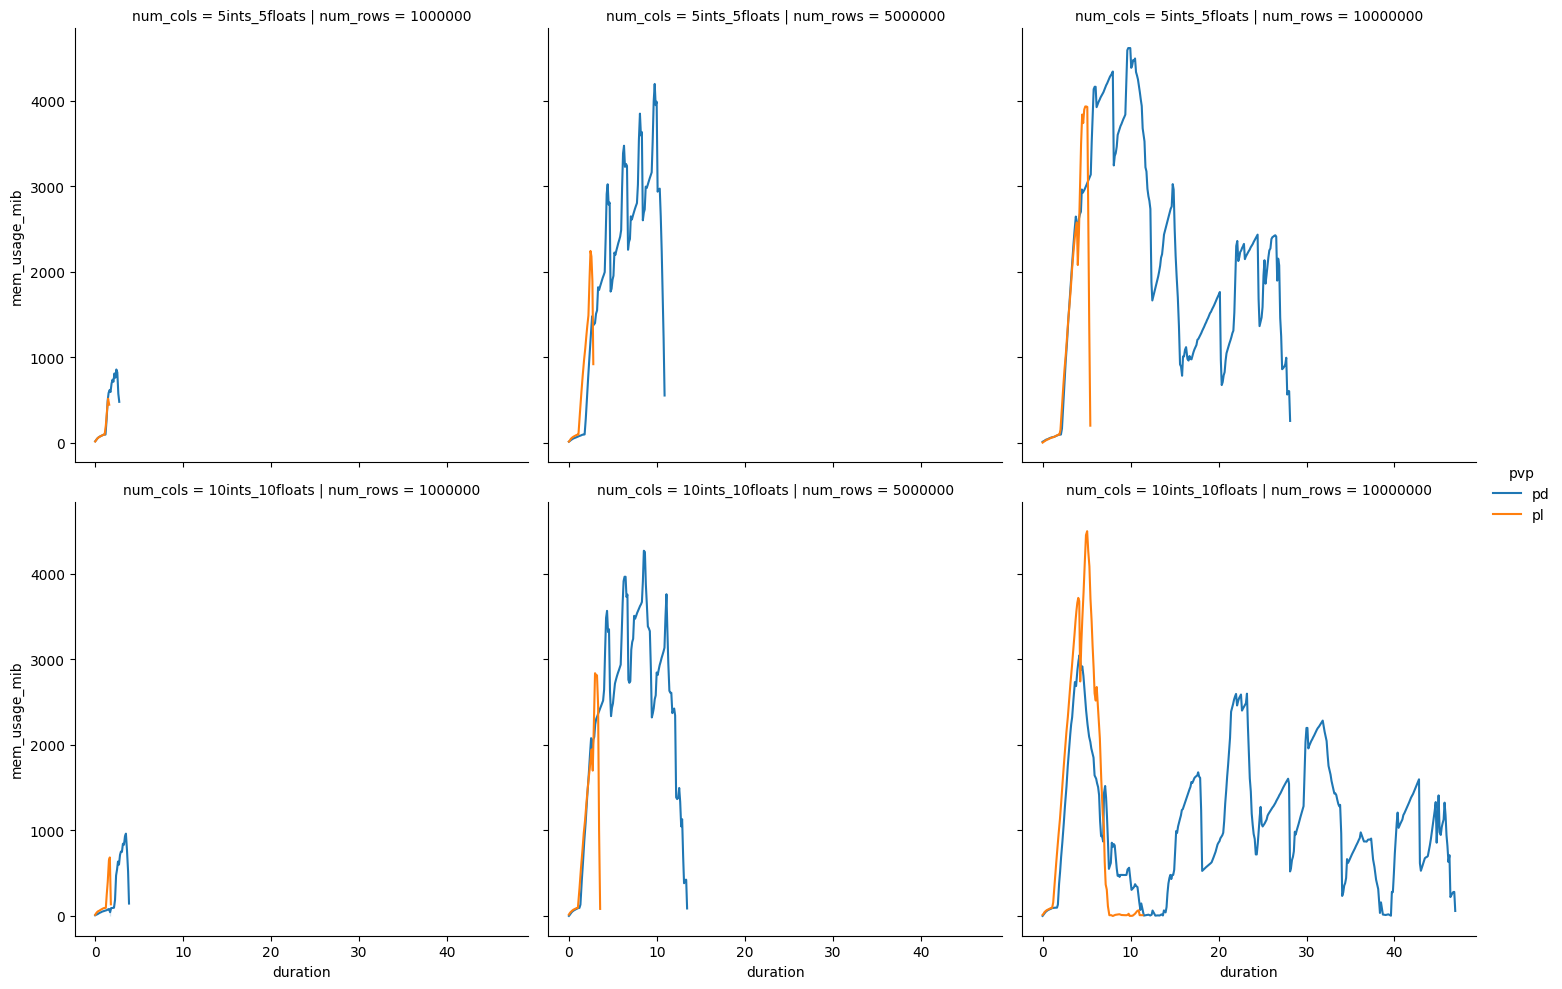

In [92]:
# Create a line plot with color based on cmdline_args

sns.relplot(
    data=dfreading, x='duration', y='mem_usage_mib', hue='pvp', row='num_cols', col = 'num_rows', kind='line')

# Set the x-axis and y-axis labels
# plt.xlabel('Timestamp')
# plt.ylabel('Memory Usage (MiB)')

# Show the legend
#plt.legend(title='Cmdline Args', loc='upper left', fontsize=7)

# Show the plot
plt.show()

In [39]:
dfreading[dfreading['num_rows'] != 1000000]

,i,mem_usage_mib,timestamp,cmdline_file,cmdline_args,duration,pvp,dataset,type_join,join_on,num_rows,num_cols
10793,0,12.000000,1.698350e+09,./benchmarks/reading.py,--pvp pd --dataset dataset_5000000rows_5ints_5...,0.0000,pd,dataset_5000000rows_5ints_5floats,NaN,NaN,5000000,5ints_5floats
10794,1,19.824219,1.698350e+09,./benchmarks/reading.py,--pvp pd --dataset dataset_5000000rows_5ints_5...,0.1086,pd,dataset_5000000rows_5ints_5floats,NaN,NaN,5000000,5ints_5floats
10795,2,29.093750,1.698350e+09,./benchmarks/reading.py,--pvp pd --dataset dataset_5000000rows_5ints_5...,0.2112,pd,dataset_5000000rows_5ints_5floats,NaN,NaN,5000000,5ints_5floats
10796,3,36.937500,1.698350e+09,./benchmarks/reading.py,--pvp pd --dataset dataset_5000000rows_5ints_5...,0.3214,pd,dataset_5000000rows_5ints_5floats,NaN,NaN,5000000,5ints_5floats
10797,4,44.640625,1.698350e+09,./benchmarks/reading.py,--pvp pd --dataset dataset_5000000rows_5ints_5...,0.4313,pd,dataset_5000000rows_5ints_5floats,NaN,NaN,5000000,5ints_5floats
...,...,...,...,...,...,...,...,...,...,...,...,...
10966,76,66.328125,1.698350e+09,./benchmarks/reading.py,--pvp pl --dataset dataset_10000000rows_10ints...,10.9215,pl,dataset_10000000rows_10ints_10floats,NaN,NaN,10000000,10ints_10floats
10967,77,9.796875,1.698350e+09,./benchmarks/reading.py,--pvp pl --dataset dataset_10000000rows_10ints...,11.0310,pl,dataset_10000000rows_10ints_10floats,NaN,NaN,10000000,10ints_10floats
10968,78,9.800781,1.698350e+09,./benchmarks/reading.py,--pvp pl --dataset dataset_10000000rows_10ints...,11.1348,pl,dataset_10000000rows_10ints_10floats,NaN,NaN,10000000,10ints_10floats
10969,79,9.511719,1.698350e+09,./benchmarks/reading.py,--pvp pl --dataset dataset_10000000rows_10ints...,11.2491,pl,dataset_10000000rows_10ints_10floats,NaN,NaN,10000000,10ints_10floats


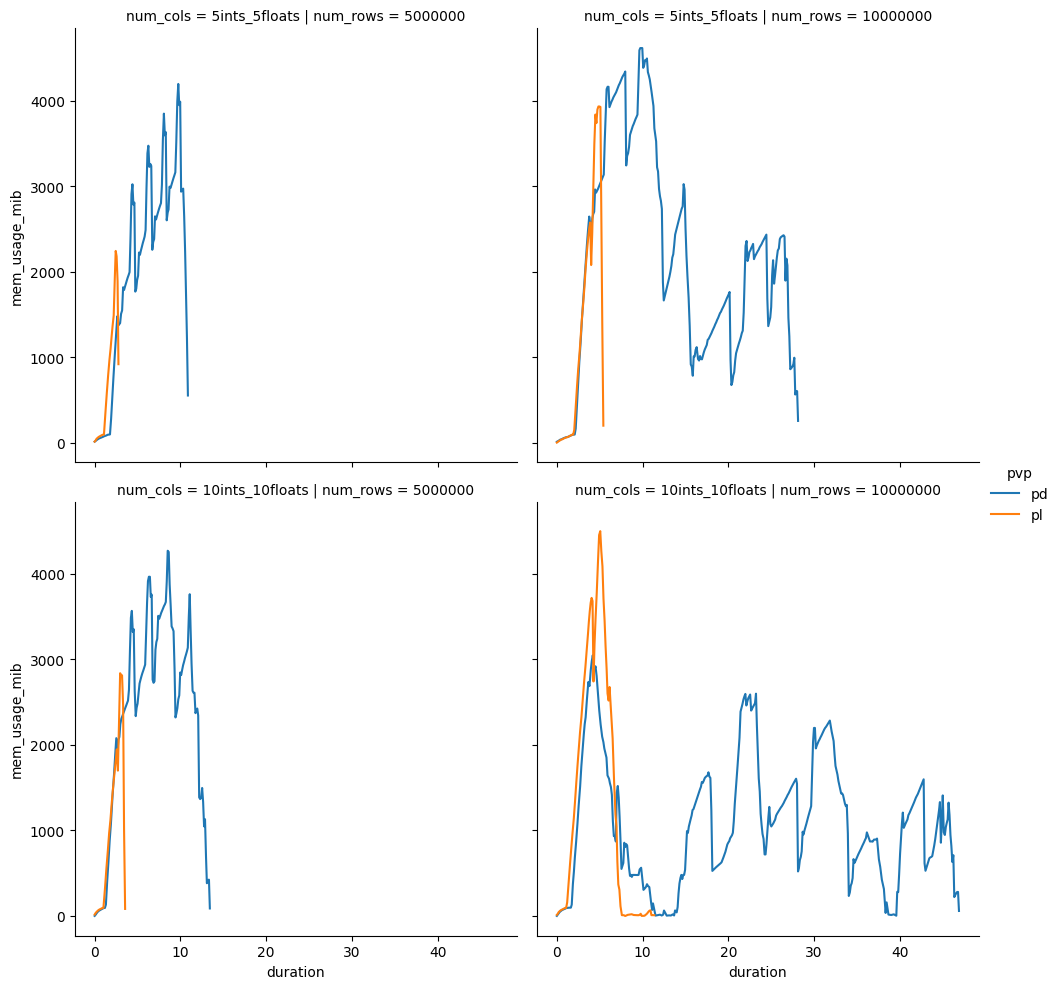

In [40]:
# Create a line plot with color based on cmdline_args

sns.relplot(
    data=dfreading[dfreading['num_rows'] != 1000000], x='duration', y='mem_usage_mib', hue='pvp', row='num_cols', col = 'num_rows', kind='line')

# Set the x-axis and y-axis labels
# plt.xlabel('Timestamp')
# plt.ylabel('Memory Usage (MiB)')

# Show the legend
#plt.legend(title='Cmdline Args', loc='upper left', fontsize=7)

# Show the plot
plt.show()


# FILTER

In [93]:
dffiltering=allDF[allDF['cmdline_file'] == './benchmarks/filtering.py']

In [94]:
dffiltering['num_cols'] = dffiltering['cmdline_args'].str.extract(r'rows_(\w+)')
dffiltering['num_rows'] = dffiltering['cmdline_args'].str.extract(r'_(\w+)rows_')

C:\Users\IvanEsin\AppData\Local\Temp\ipykernel_13412\1857535203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffiltering['num_cols'] = dffiltering['cmdline_args'].str.extract(r'rows_(\w+)')
C:\Users\IvanEsin\AppData\Local\Temp\ipykernel_13412\1857535203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffiltering['num_rows'] = dffiltering['cmdline_args'].str.extract(r'_(\w+)rows_')


In [95]:
dffiltering['num_rows'] = dffiltering.num_rows.astype('int')

C:\Users\IvanEsin\AppData\Local\Temp\ipykernel_13412\2084799538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffiltering['num_rows'] = dffiltering.num_rows.astype('int')


In [96]:
dffiltering = dffiltering.sort_values(['pvp', 'num_cols', 'num_rows'], ascending=[True, False, True])

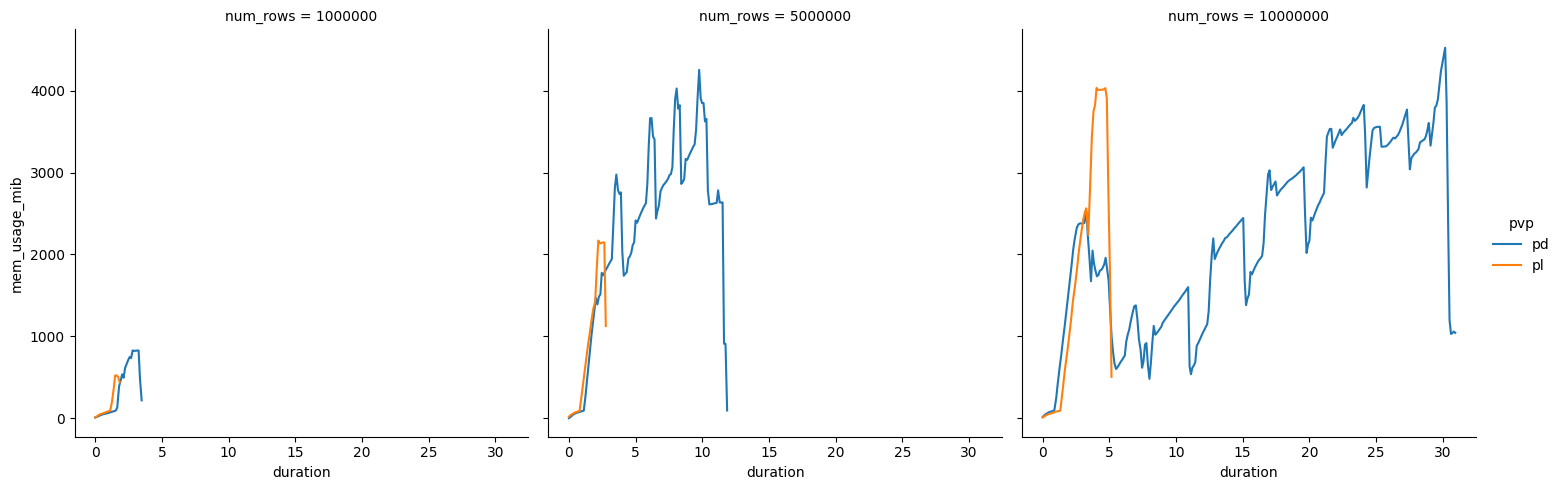

In [136]:
# Create a line plot with color based on cmdline_args
sns.relplot(
    data=dffiltering, x='duration', y='mem_usage_mib', hue='pvp', col = 'num_rows', kind='line')

# Set the x-axis and y-axis labels
# plt.xlabel('Timestamp')
# plt.ylabel('Memory Usage (MiB)')

# Show the legend
#plt.legend(title='Cmdline Args', loc='upper left', fontsize=7)

# Show the plot
plt.show()

# JOINS

In [41]:
dfjoining=allDF[allDF['cmdline_file'] == './benchmarks/joinings.py']

In [42]:
dfjoining['num_cols'] = dfjoining['cmdline_args'].str.extract(r'rows_(\w+)')
dfjoining['num_rows'] = dfjoining['cmdline_args'].str.extract(r'_(\w+)rows_')

C:\Users\IvanEsin\AppData\Local\Temp\ipykernel_1472\3791707982.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\IvanEsin\AppData\Local\Temp\ipykernel_1472\3791707982.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
dfjoining['num_rows'] = dfjoining.num_rows.astype('int')

C:\Users\IvanEsin\AppData\Local\Temp\ipykernel_1472\3861929088.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
dfjoining = dfjoining.sort_values(['pvp', 'num_cols', 'num_rows'], ascending=[True, False, True])

In [46]:
dfjoiningcountry = dfjoining[dfjoining['join_on'] == 'country']
dfjoiningcountrycode = dfjoining[dfjoining['join_on'] == 'country_code']

### Joining on country

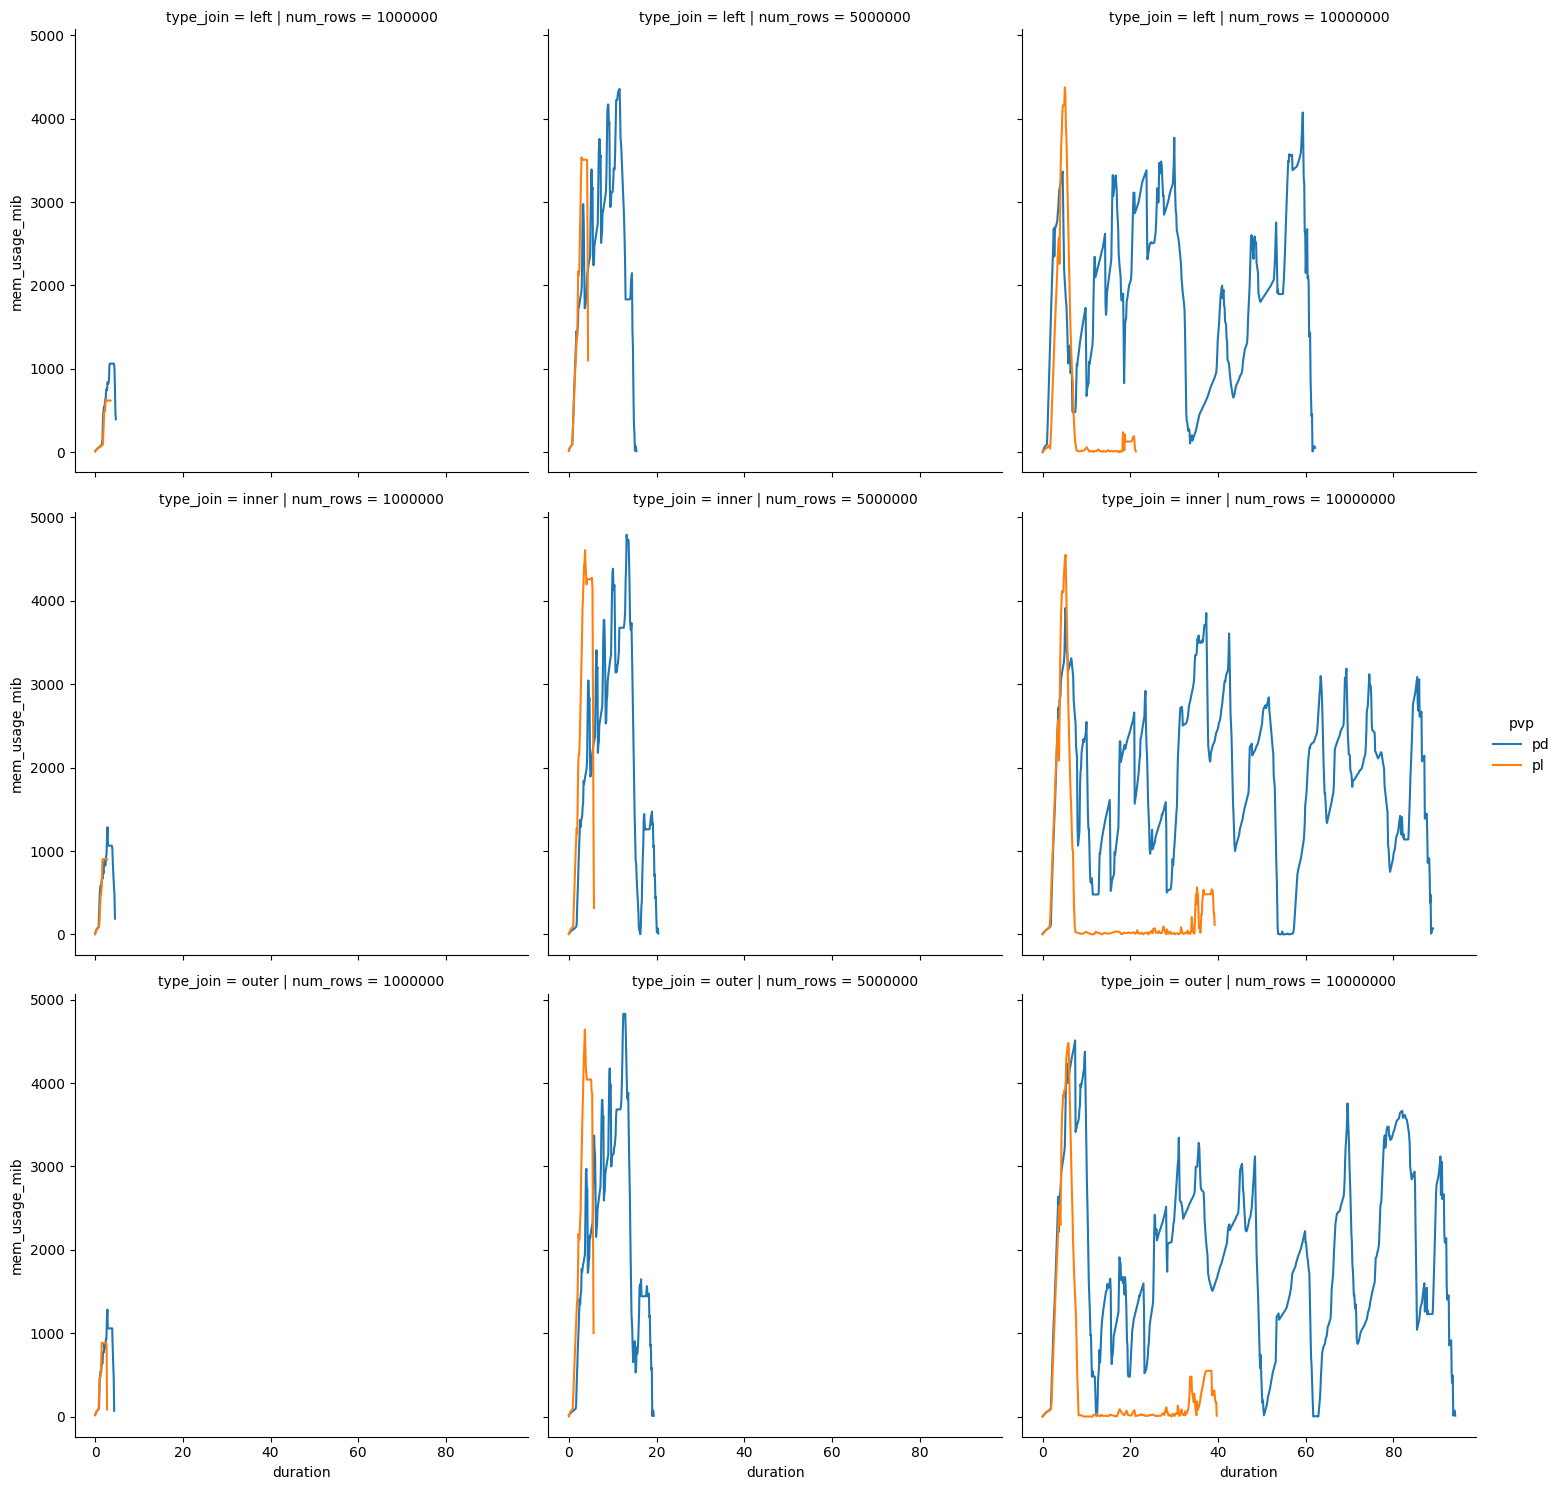

In [108]:
# Create a line plot with color based on cmdline_args
sns.relplot(
    data=dfjoiningcountry, x='duration', y='mem_usage_mib', hue='pvp', row='type_join', col = 'num_rows', kind='line')

# Set the x-axis and y-axis labels
# plt.xlabel('Timestamp')
# plt.ylabel('Memory Usage (MiB)')

# Show the legend
#plt.legend(title='Cmdline Args', loc='upper left', fontsize=7)

# Show the plot
plt.show()

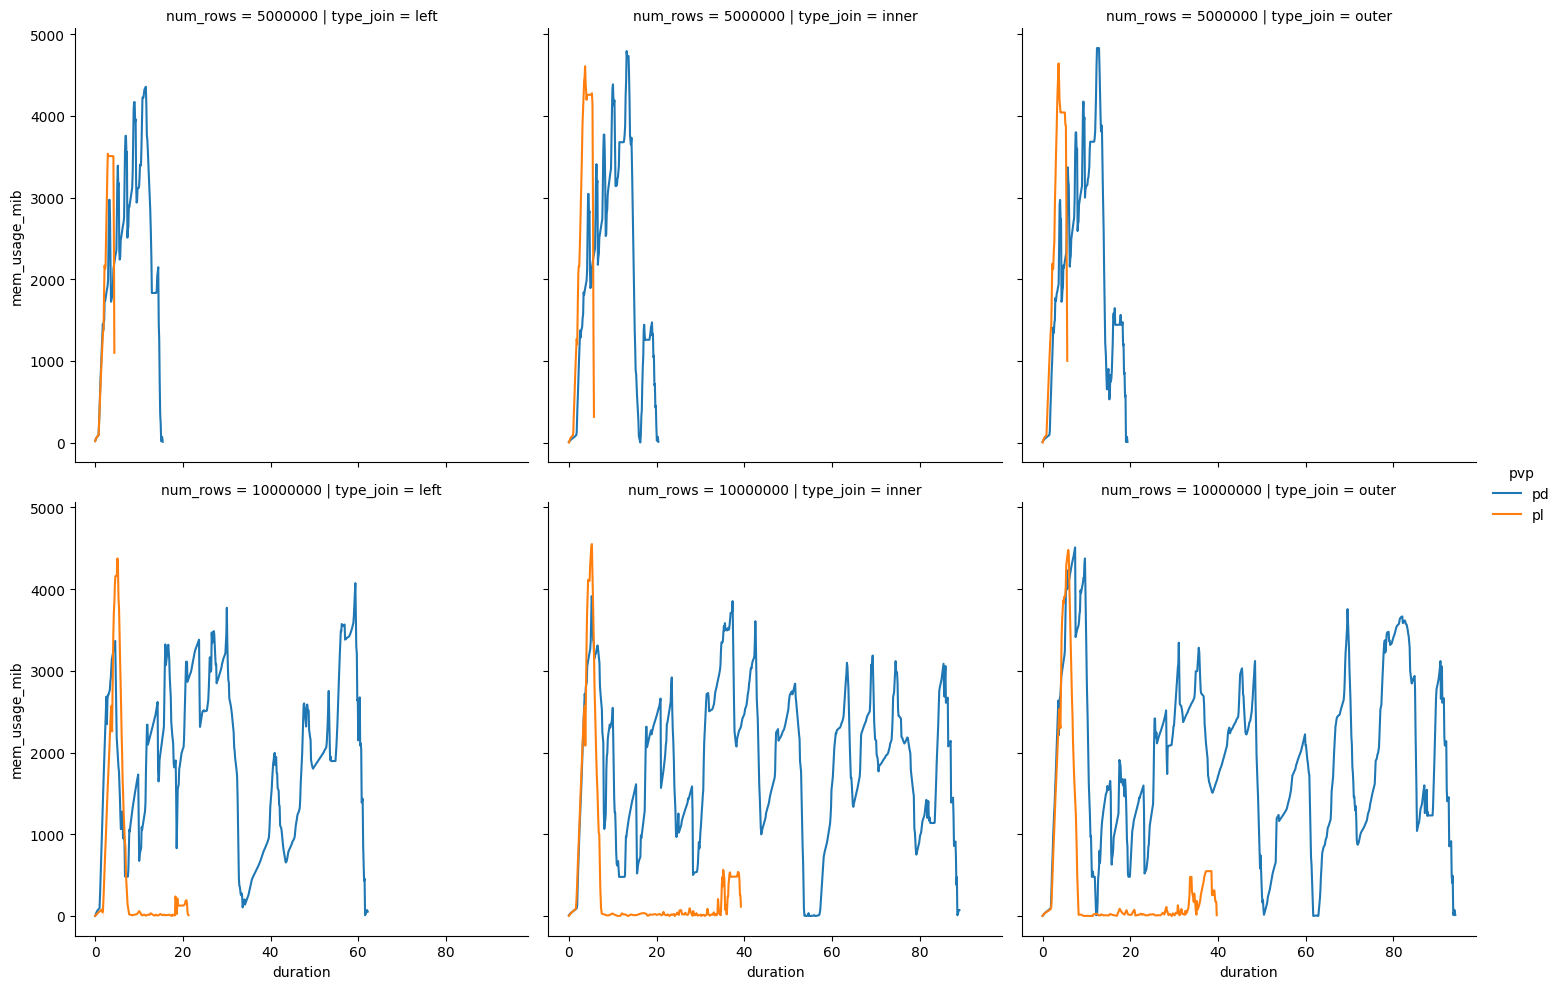

In [48]:
# Create a line plot with color based on cmdline_args

sns.relplot(
    data=dfjoiningcountry[dfjoiningcountry['num_rows'] != 1000000], x='duration', y='mem_usage_mib', hue='pvp', row='num_rows', col = 'type_join', kind='line')

# Set the x-axis and y-axis labels
# plt.xlabel('Timestamp')
# plt.ylabel('Memory Usage (MiB)')

# Show the legend
#plt.legend(title='Cmdline Args', loc='upper left', fontsize=7)

# Show the plot
plt.show()

### Joining on country & code

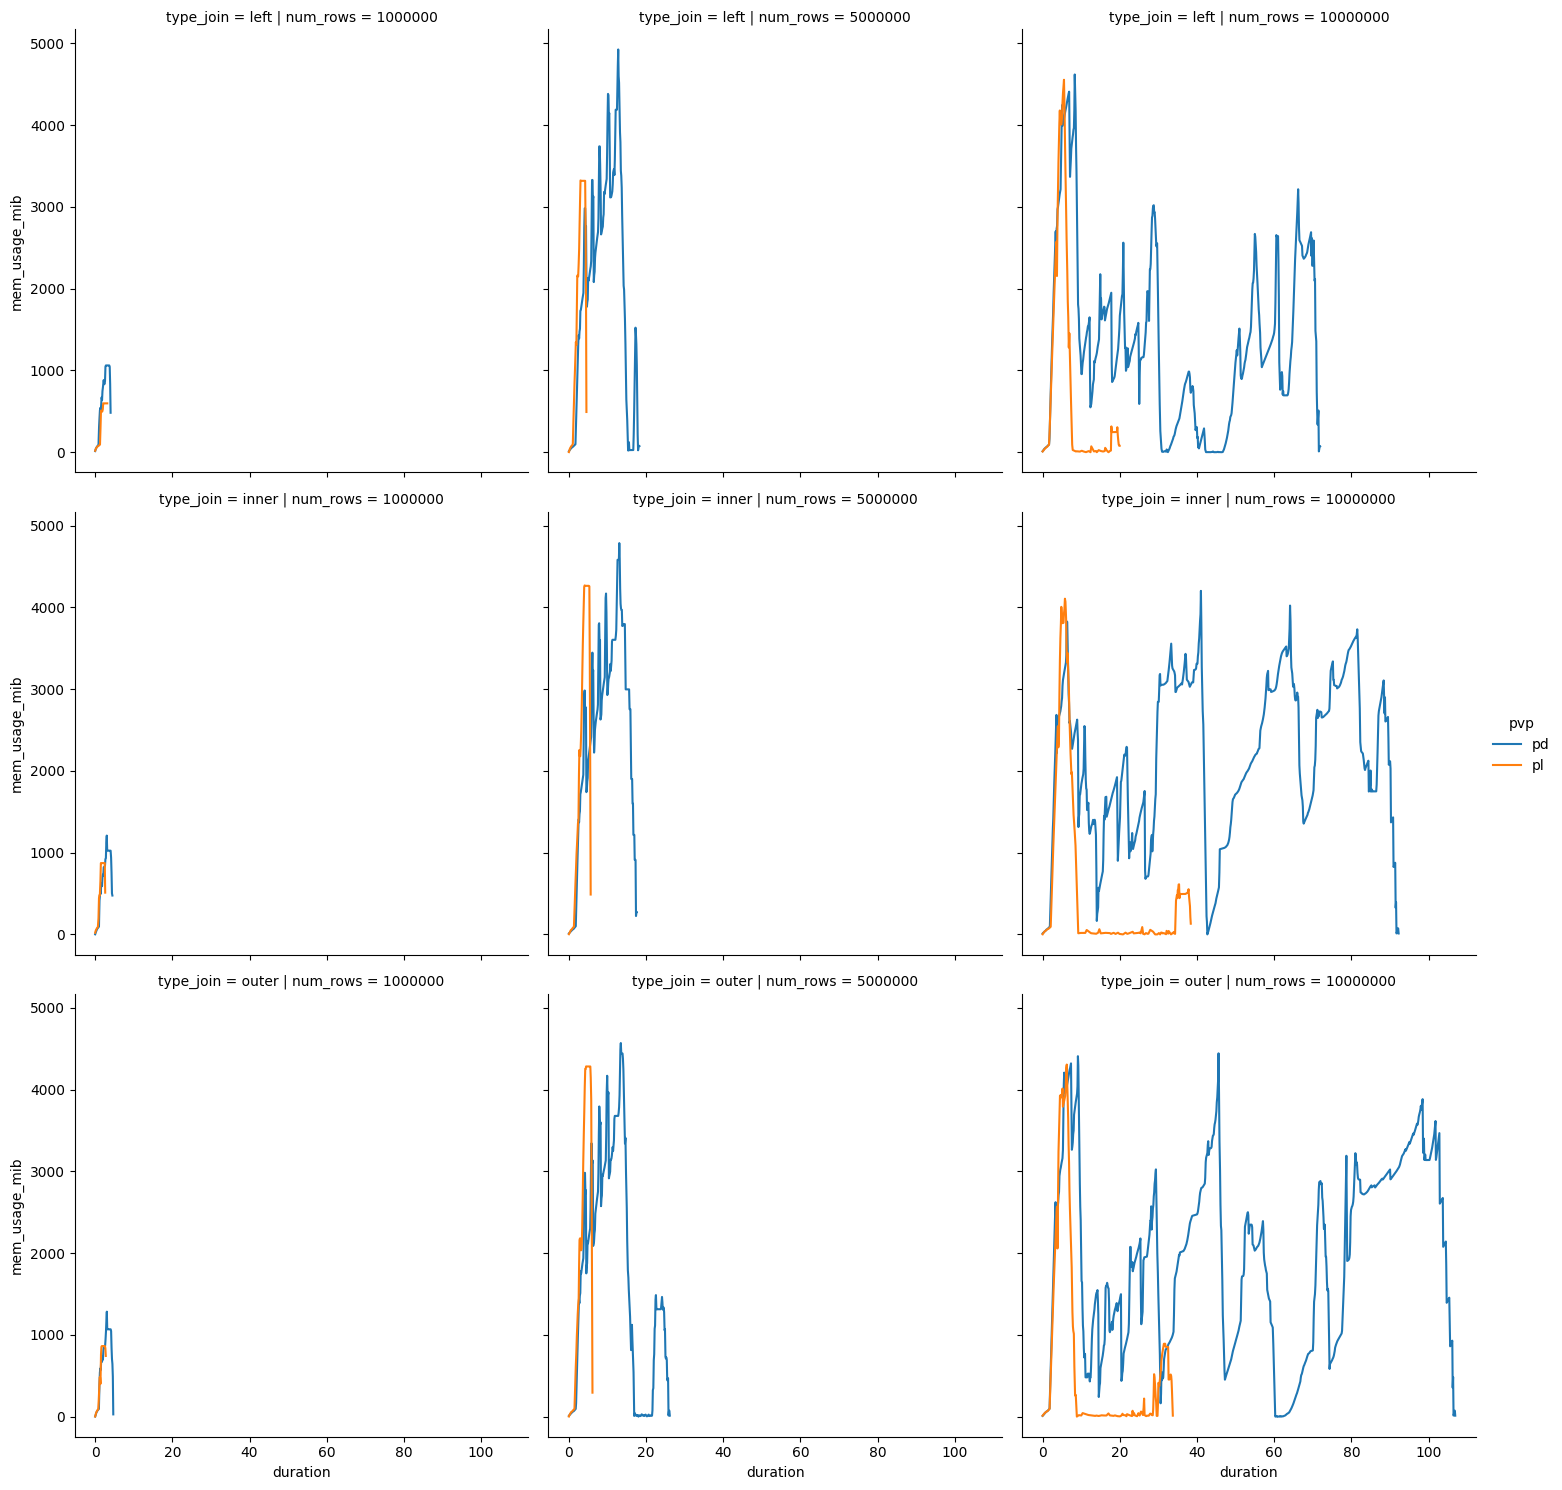

In [109]:
# Create a line plot with color based on cmdline_args
sns.relplot(
    data=dfjoiningcountrycode, x='duration', y='mem_usage_mib', hue='pvp', row='type_join', col = 'num_rows', kind='line')

# Set the x-axis and y-axis labels
# plt.xlabel('Timestamp')
# plt.ylabel('Memory Usage (MiB)')

# Show the legend
#plt.legend(title='Cmdline Args', loc='upper left', fontsize=7)

# Show the plot
plt.show()

# GROUPBY & AGGREGATE

In [111]:
dfaggregating=allDF[allDF['cmdline_file'] == './benchmarks/aggregating.py']

In [112]:
dfaggregating['num_cols'] = dfaggregating['cmdline_args'].str.extract(r'rows_(\w+)')
dfaggregating['num_rows'] = dfaggregating['cmdline_args'].str.extract(r'_(\w+)rows_')

C:\Users\IvanEsin\AppData\Local\Temp\ipykernel_13412\71769337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfaggregating['num_cols'] = dfaggregating['cmdline_args'].str.extract(r'rows_(\w+)')
C:\Users\IvanEsin\AppData\Local\Temp\ipykernel_13412\71769337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfaggregating['num_rows'] = dfaggregating['cmdline_args'].str.extract(r'_(\w+)rows_')


In [113]:
dfaggregating['num_rows'] = dfaggregating.num_rows.astype('int')

C:\Users\IvanEsin\AppData\Local\Temp\ipykernel_13412\248387760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfaggregating['num_rows'] = dfaggregating.num_rows.astype('int')


In [114]:
dfaggregating = dfaggregating.sort_values(['pvp', 'num_cols', 'num_rows'], ascending=[True, False, True])

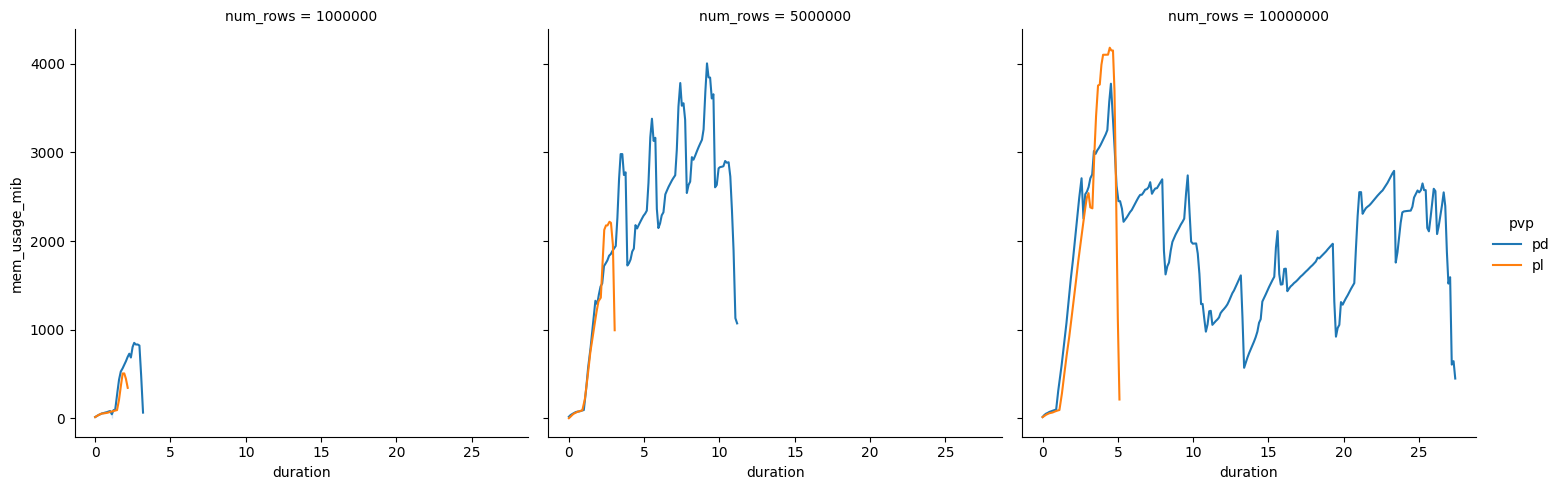

In [140]:
# Create a line plot with color based on cmdline_args
sns.relplot(
    data=dfaggregating, x='duration', y='mem_usage_mib', hue='pvp', col = 'num_rows', kind='line')

# Set the x-axis and y-axis labels
# plt.xlabel('Timestamp')
# plt.ylabel('Memory Usage (MiB)')

# Show the legend
#plt.legend(title='Cmdline Args', loc='upper left', fontsize=7)

# Show the plot
plt.show()

# AVERAGES

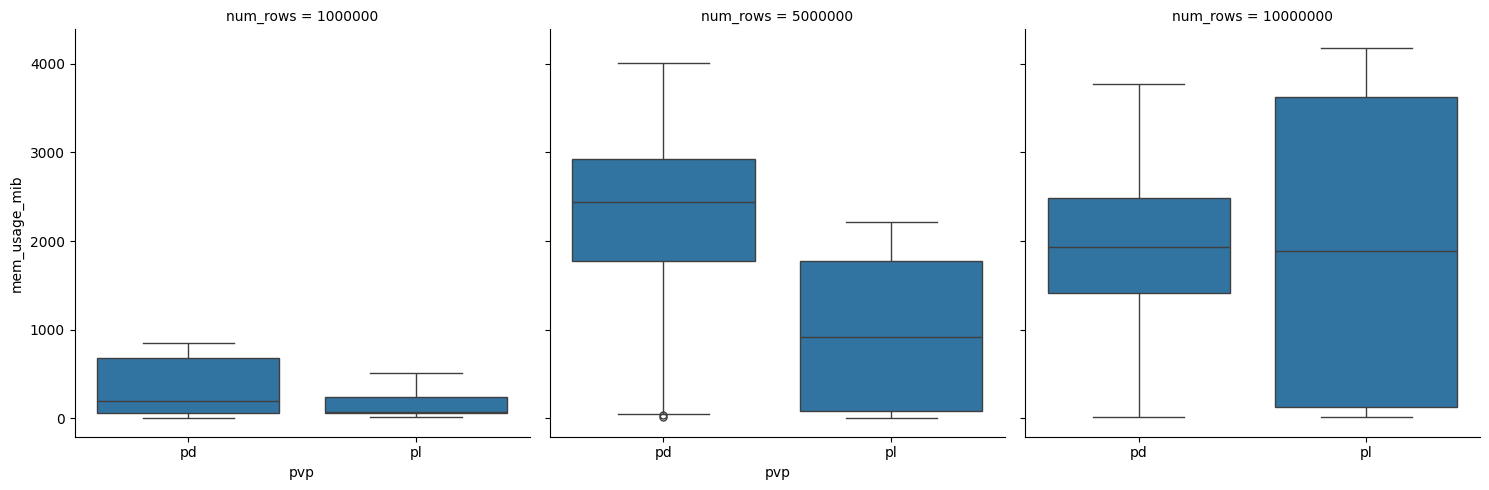

In [134]:
# Create a box plot for memory usage in Pandas and Polars
sns.catplot(data=dfaggregating, x='pvp', y='mem_usage_mib', col='num_rows', kind='box')
plt.xlabel('')
plt.show()


In [9]:
dfmeans = allDF[allDF['cmdline_file'] != './benchmarks/writing.py']
dfmeans['num_rows'] = dfmeans['cmdline_args'].str.extract(r'_(\w+)rows_')
dfmeans['num_rows'] = dfmeans.num_rows.astype('int')
dfmeans = pd.concat([dfwriting, dfmeans])
dfmeans = dfmeans.sort_values(['pvp', 'num_rows'], ascending=[True, True])

C:\Users\IvanEsin\AppData\Local\Temp\ipykernel_1472\809870084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmeans['num_rows'] = dfmeans['cmdline_args'].str.extract(r'_(\w+)rows_')
C:\Users\IvanEsin\AppData\Local\Temp\ipykernel_1472\809870084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmeans['num_rows'] = dfmeans.num_rows.astype('int')


In [10]:
# Calculate the average memory usage for each category
average_memory_usage = dfmeans.groupby(['pvp', 'cmdline_file'])['mem_usage_mib'].mean().reset_index()

In [11]:
average_memory_usage

,pvp,cmdline_file,mem_usage_mib
0,pd,./benchmarks/aggregating.py,1855.811111
1,pd,./benchmarks/filtering.py,2105.213507
2,pd,./benchmarks/joinings.py,1888.156269
3,pd,./benchmarks/reading.py,1613.637462
4,pd,./benchmarks/writing.py,2170.837908
5,pl,./benchmarks/aggregating.py,1221.931124
6,pl,./benchmarks/filtering.py,1211.783537
7,pl,./benchmarks/joinings.py,1061.117050
8,pl,./benchmarks/reading.py,1069.410027
9,pl,./benchmarks/writing.py,2169.527035


In [14]:
dfmeans

,i,mem_usage_mib,timestamp,cmdline_file,cmdline_args,duration,pvp,dataset,type_join,join_on,num_rows,num_cols
10612,0,8.312500,1.698350e+09,./benchmarks/reading.py,--pvp pd --dataset dataset_1000000rows_10ints_...,0.0000,pd,dataset_1000000rows_10ints_10floats,NaN,NaN,1000000,NaN
10613,1,14.531250,1.698350e+09,./benchmarks/reading.py,--pvp pd --dataset dataset_1000000rows_10ints_...,0.1098,pd,dataset_1000000rows_10ints_10floats,NaN,NaN,1000000,NaN
10614,2,19.640625,1.698350e+09,./benchmarks/reading.py,--pvp pd --dataset dataset_1000000rows_10ints_...,0.2279,pd,dataset_1000000rows_10ints_10floats,NaN,NaN,1000000,NaN
10615,3,26.136719,1.698350e+09,./benchmarks/reading.py,--pvp pd --dataset dataset_1000000rows_10ints_...,0.3501,pd,dataset_1000000rows_10ints_10floats,NaN,NaN,1000000,NaN
10616,4,34.085938,1.698350e+09,./benchmarks/reading.py,--pvp pd --dataset dataset_1000000rows_10ints_...,0.4576,pd,dataset_1000000rows_10ints_10floats,NaN,NaN,1000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8114,625,1289.128906,1.698350e+09,./benchmarks/writing.py,--pvp pl --num_rows 5000000 --num_int_cols 10 ...,69.0938,pl,NaN,NaN,NaN,5000000,10ints_10floats
8115,626,1312.890625,1.698350e+09,./benchmarks/writing.py,--pvp pl --num_rows 5000000 --num_int_cols 10 ...,69.2196,pl,NaN,NaN,NaN,5000000,10ints_10floats
8116,627,1339.835938,1.698350e+09,./benchmarks/writing.py,--pvp pl --num_rows 5000000 --num_int_cols 10 ...,69.3361,pl,NaN,NaN,NaN,5000000,10ints_10floats
8117,628,1344.843750,1.698350e+09,./benchmarks/writing.py,--pvp pl --num_rows 5000000 --num_int_cols 10 ...,69.4540,pl,NaN,NaN,NaN,5000000,10ints_10floats


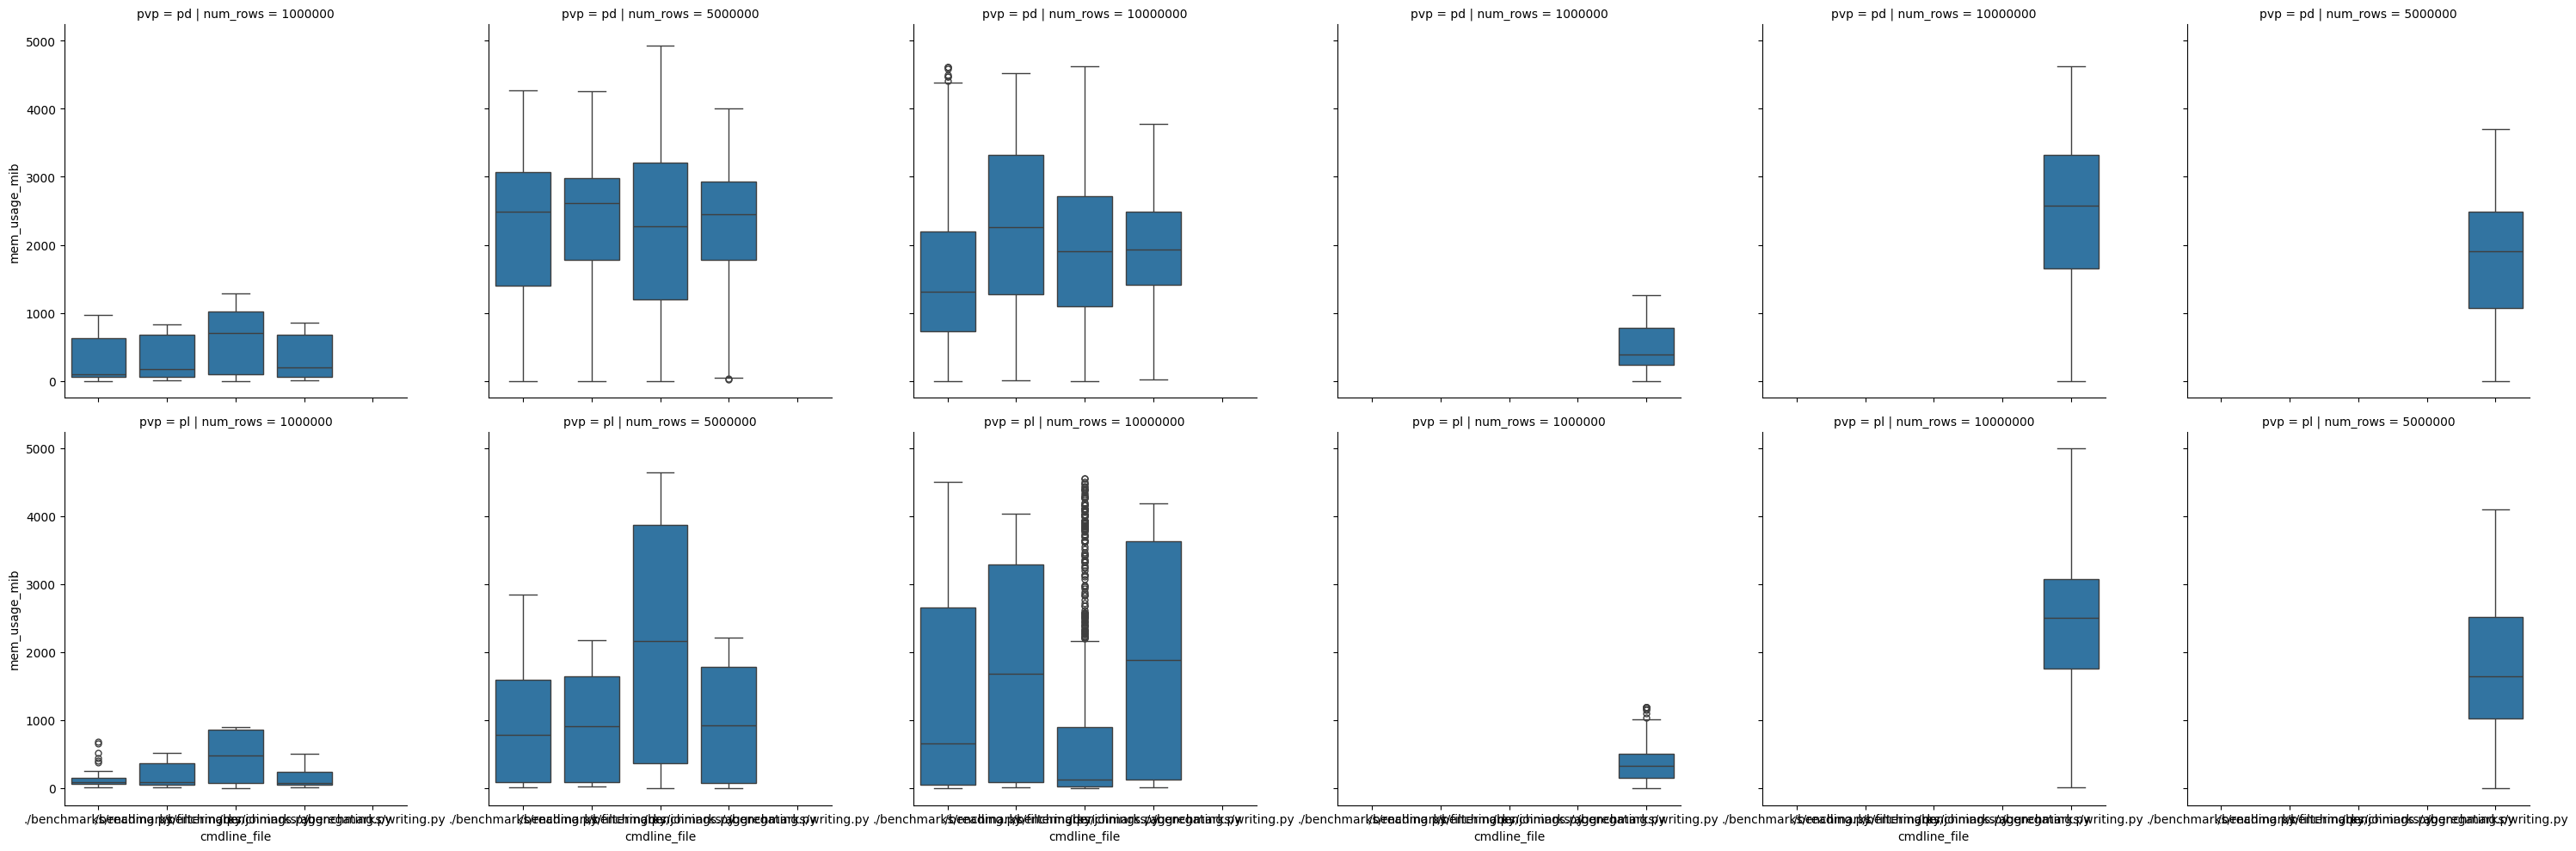

In [16]:
# Create a box plot for memory usage in Pandas and Polars
sns.catplot(data=dfmeans, x='cmdline_file', y='mem_usage_mib', col='num_rows', kind='box', row='pvp')
plt.xlabel('')
plt.show()


In [12]:
import plotly.express as px

# Create a bar chart
fig = px.bar(
    average_memory_usage,
    x='cmdline_file',
    y='mem_usage_mib',
    color='pvp',
    labels={'cmdline_file': 'Command Line File', 'mem_usage_mib': 'Memory Usage (MiB)'},
)

fig.update_layout(
    xaxis_title='Command Line File',
    yaxis_title='Memory Usage (MiB)',
    legend_title='Library',
    barmode='group',  # Use 'group' to group bars by 'pvp'
)

fig.show()

In [223]:
average_memory_usage = average_memory_usage.pivot(index='pvp', columns='cmdline_file', values='mem_usage_mib').reset_index()

In [224]:
average_memory_usage

cmdline_file,pvp,./benchmarks/aggregating.py,./benchmarks/filtering.py,./benchmarks/joinings.py,./benchmarks/reading.py,./benchmarks/writing.py
0,pd,1855.811111,2105.213507,1888.156269,1613.637462,2170.837908
1,pl,1221.931124,1211.783537,1061.117050,1069.410027,2169.527035


In [201]:
import plotly.express as px

# Create a parallel coordinates plot
fig = px.parallel_coordinates(
    average_memory_usage,
    dimensions=['./benchmarks/aggregating.py', './benchmarks/filtering.py'],
    color='pvp',
    labels={'./benchmarks/aggregating.py': 'aggregating', './benchmarks/filtering.py': 'Memory Usage (MiB)'},
    color_continuous_scale=px.colors.qualitative.Set1
)

fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=list(average_memory_usage['cmdline_file'].unique())),
    showlegend=True,
    legend=dict(orientation='h', y=1.2),
)

fig.show()


ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['./benchmarks/aggregating.py', './benchmarks/filtering.py', './benchmarks/joinings.py', './benchmarks/reading.py', './benchmarks/writing.py'] but received: pvp

In [193]:
import polars as pl
os.getcwd()
example=pl.read_parquet('./datasets/dataset_1000000rows_5ints_5floats.parquet').head()

In [196]:
example[['CustomerID', 'Name', 'Email', 'Phone', 'Address', 'Country', 'Code', 'Gender', 'int_columncolumn_1', 'float_column_1']]

CustomerID,Name,Email,Phone,Address,Country,Code,Gender,int_columncolumn_1,float_column_1
i64,str,str,str,str,str,str,str,i64,f64
1,"""HRuOR""","""knybehc@exampl…","""9179533413""","""V6yErzZQp6""","""France""","""44""","""Female""",36,0.217585
2,"""wbPHz""","""krgtxdr@exampl…","""8467926472""","""c33Ylpyt8S""","""Monaco""","""03""","""Female""",93,0.328272
3,"""nvTeI""","""dzovfyv@exampl…","""4552957047""","""6bnyfTTMN2""","""Azerbaijan""","""35""","""Female""",9,0.334924
4,"""prFAg""","""cyciutp@exampl…","""3599193154""","""Bd08MvSvLw""","""United Kingdom…","""65""","""Male""",98,0.646239
5,"""AWDHu""","""mrxmwwz@exampl…","""8513623083""","""3RKFpwXjck""","""San Marino""","""93""","""Female""",70,0.657637


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed